# PROJECT REPORT GROUP 26

## Impact of Age, Cholesterol Levels, and Maximum Heart Rate on Heart Disease

### Introduction

Heart disease is one of the leading causes of death around the globe (Fillmore et al., 2014). Several factors can increase the likelihood of developing heart diseases, such as age, high blood pressure, high cholesterol levels, maximum heart rate, diabetes, obesity and family history. (Dahlöf, 2010 ADD TWO NEW CITATIONS HERE).

In this project, we aim to investigate the impact of age and cholesterol levels on the chances of developing heart disease. Therefore, the main question we will try to answer with our project is: "Do age and cholesterol levels affect the likelihood of developing heart disease?" To do this, we will build a K-nearest neighbors classification model to predict diagnosis using age and cholesterol level predictor variables.

The dataset we are using is collected by the University of California, Irvine, and contains data on 303 individuals and 14 different variables. Demographic and clinical measurements include age, sex, chest pain type, resting blood pressure, and serum cholesterol in mg/dL, among others.

### Methods and Results

The dataset was loaded onto R and then given column names that correspond to those on the website. Previous studies such as (ADD CITATIONS) had found various risk factors for heart disease including age, family history and obesity, among others. The risk factors that appeared in both the dataset and the studies included age, resting blood pressure, cholesterol level, and maximum heart rate. Age, resting blood pressure, cholesterol level, and maximum heart rate variables were then selected, along with the diagnosis variable to be wrangled into a tidy format. The diagnosis variable is then mutated such that it only outputs TRUE or FALSE to indicate whether a heart disease is present or not with TRUE indicating the presence of one and FALSE indicating the absence. The new Diagnosis variable is then selected for and the data is split into training and testing data. Table 1 is created as a summary of the data set, showing the mean of all of the variables for both levels of Diagnosis along with whether any of the variables have any missing data. Then cholesterol levels, blood pressure, and maximum heart rate were plotted against age, to see if they would be useful to predict whether somone has a heart disease or not. Each of these three plots were also seperated by the Diagnosis variable using the faucet_wrap() function. We did this to determine where each level of Diagnosis localizes on the variable range, and we could use this information to choose our predictors. Table 1 showed that both the mean age and mean resting blood pressure were only seperated by a small margin of about 3 or 4 units between the two levels of Diagnosis. This inidicates that they may not be strong predictor variables to use in the classification because they are too similar between the two classes. However, age is considered to be one of the stronger predictors of heart disease in (ADD STUDIES) so we will use age as one of our predictor variables. The mean cholesterol level and mean maximum heart rate were seperated by a larger margin indicating that they may be strong predictor variables to use. We then used the plots to decide which other predictor variables to use. Figure 2 and 6 both show that the two levels of Diagnosis localize in different variable ranges on the plots. In figure 6, the data points with the absence of a heart disease tend to be younger with a higher maximum heart rate and the data points with the presence of a heart disease tend to be older with a lower maximum heart rate. Figure 2 shows that although the cholesterol range is realtively similar between the two levels of Diagnosis, the data points with a heart disease tend to be older while the opposite is true for the data points without a heart disease. Figure 4 shows that the range of resting blood pressure is quite similar between the two levels of Diagnosis making it hard to distinguish whether someone has a heart disease or not. Combining this exploratory data analysis of the Table 1 and Figures 2, 4, and 6, we determined that resting blood pressure would not be a good predictor value and that we would use age, cholesterol level and maximum heart rate achieved to create a classifcation model. We then used cross-validation to tune our model in order to find the best K-value to use in out K-nearest neighbours algorithm. After finding that the best K-value is 31, we used it in the K-nearest neighbours algorithm to build our classifier and then tested it on our training data. The accuracy of our classifier was determined to be 80%. We then produced a confusion matrix to analyze our results along with a table for the majority classifier to compare our accuracy with.


### Data Analysis

In [2]:
#Load this before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
#Reading data into R

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_heart <- read_csv(url)
head(cleveland_heart)


New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [4]:
#Change column names to given variables from dataset

colnames(cleveland_heart) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol_level", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "major_vessels_colored", "thal", "diagnosis")
head(cleveland_heart)


age,sex,chest_pain,resting_blood_pressure,cholesterol_level,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,major_vessels_colored,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


In [5]:
#Selecting our relevant variables into a tidy format

heart_clean <- cleveland_heart |>
select(age, resting_blood_pressure, cholesterol_level, maximum_heart_rate_achieved, diagnosis)
head(heart_clean)


age,resting_blood_pressure,cholesterol_level,maximum_heart_rate_achieved,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,160,286,108,2
67,120,229,129,1
37,130,250,187,0
41,130,204,172,0
56,120,236,178,0
62,140,268,160,3


In [6]:
#Change diagnosis to FALSE for no heart diagnosis and TRUE for any heart diagnosis
heart_diagnosis <- heart_clean |>
mutate(Diagnosis = (diagnosis != 0)) |>
mutate("Diagnosis" = as_factor(Diagnosis))
head(heart_diagnosis)

age,resting_blood_pressure,cholesterol_level,maximum_heart_rate_achieved,diagnosis,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,160,286,108,2,TRUE
67,120,229,129,1,TRUE
37,130,250,187,0,FALSE
41,130,204,172,0,FALSE
56,120,236,178,0,FALSE
62,140,268,160,3,TRUE


In [7]:
#Now choose the required variables

heart_data <- heart_diagnosis |>
select(-diagnosis)
head(heart_data)


age,resting_blood_pressure,cholesterol_level,maximum_heart_rate_achieved,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,160,286,108,TRUE
67,120,229,129,TRUE
37,130,250,187,FALSE
41,130,204,172,FALSE
56,120,236,178,FALSE
62,140,268,160,TRUE


In [8]:
#Split data into training and testing

set.seed(1976)

heart_data_split <- initial_split(heart_data, prop = 0.75, strata = Diagnosis)
heart_data_train <- training(heart_data_split)
heart_data_test <- testing(heart_data_split)

In [9]:
#Creating data summary table of training data

heart_table <- heart_data_train |>
group_by(Diagnosis) |>
summarize(num_obs = n(),
mean_age = mean(age, na.rm = TRUE),
mean_cholesterol = mean(cholesterol_level, na.rm = TRUE),
mean_blood_pressure = mean(resting_blood_pressure, na.rm = TRUE),
mean_max_hr_achieved = mean(maximum_heart_rate_achieved, na.rm = TRUE),
num_missing = sum((is.na(age)) + sum(is.na(cholesterol_level)) + sum(is.na(maximum_heart_rate_achieved))+ sum(is.na(resting_blood_pressure))))
heart_table


Diagnosis,num_obs,mean_age,mean_cholesterol,mean_blood_pressure,mean_max_hr_achieved,num_missing
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,122,52.40984,236.9508,128.2787,157.0082,0
TRUE,104,56.71154,248.3173,133.3077,138.7404,0


**Table 1: Mean values of each predictor chosen for presecne (TRUE) of absence (FALSE) of heart disease**

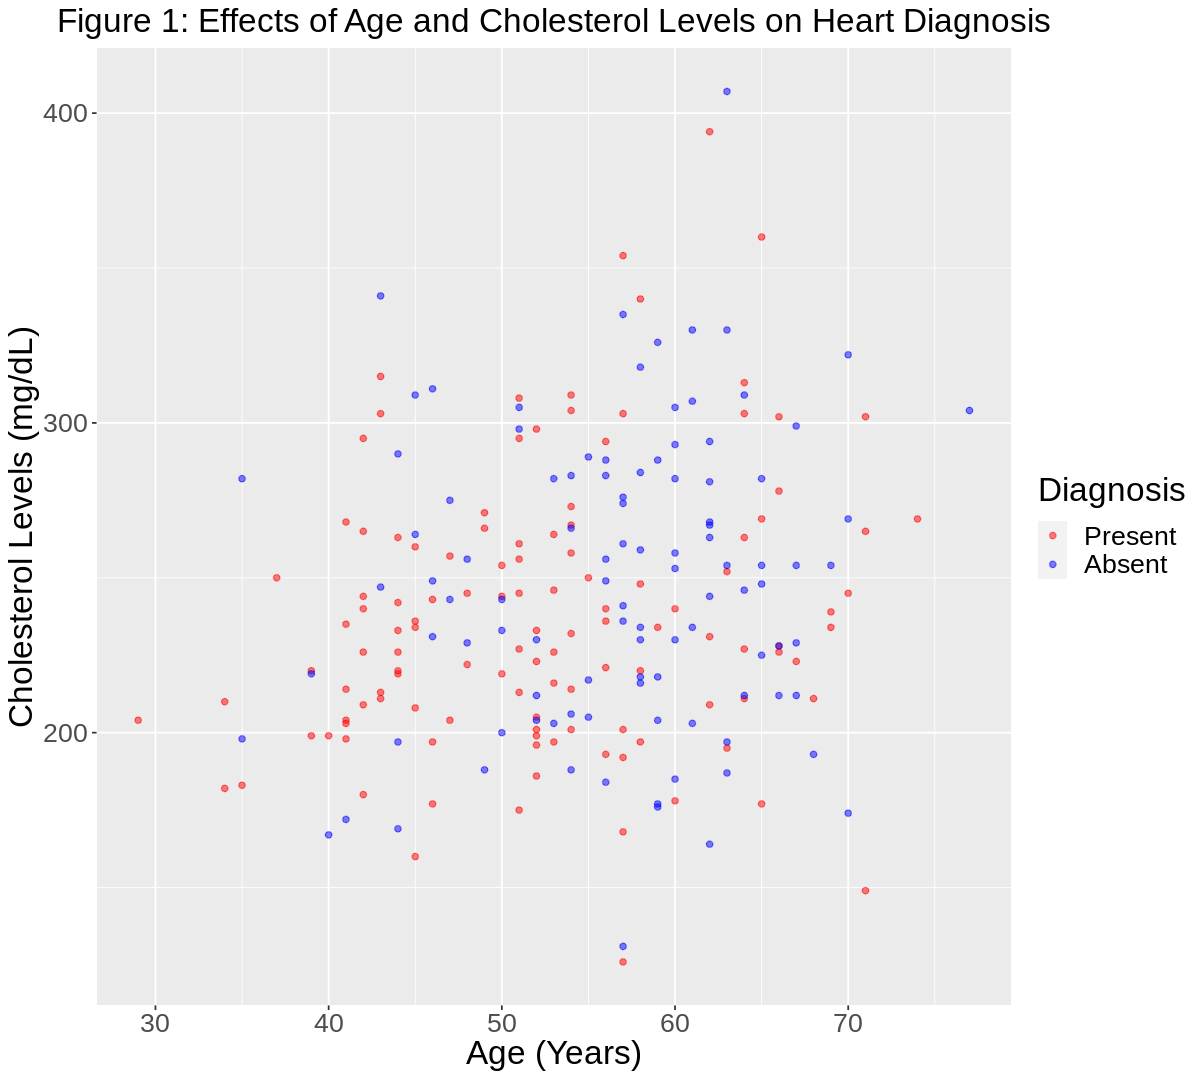

In [10]:
#Creating a plot to visualize effects of age and cholesterol levels

options(repr.plot.width = 10, repr.plot.height = 9)

cholesterol_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = cholesterol_level, color = Diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 1: Effects of Age and Cholesterol Levels on Heart Diagnosis", x = "Age (Years)", y = "Cholesterol Levels (mg/dL)", color = "Diagnosis") +
scale_color_manual(labels = c("Present", "Absent"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
cholesterol_data_plot

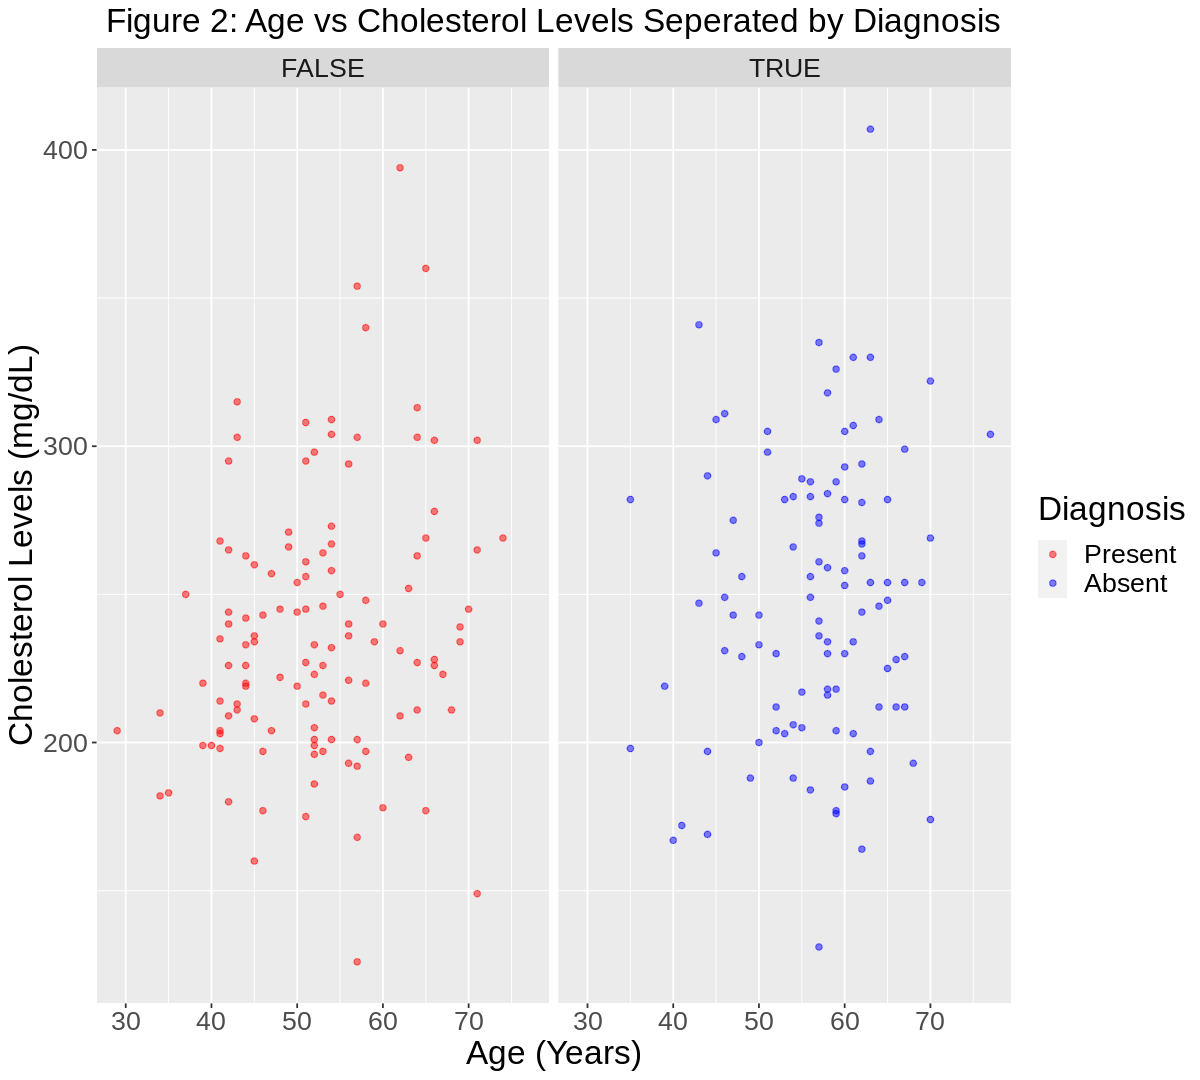

In [11]:
#Seperate the patient populations into ones with or without a diagnosis

cholesterol_plot_wrapped <- cholesterol_data_plot +
facet_wrap(~Diagnosis) + 
labs(title = "Figure 2: Age vs Cholesterol Levels Seperated by Diagnosis")
cholesterol_plot_wrapped

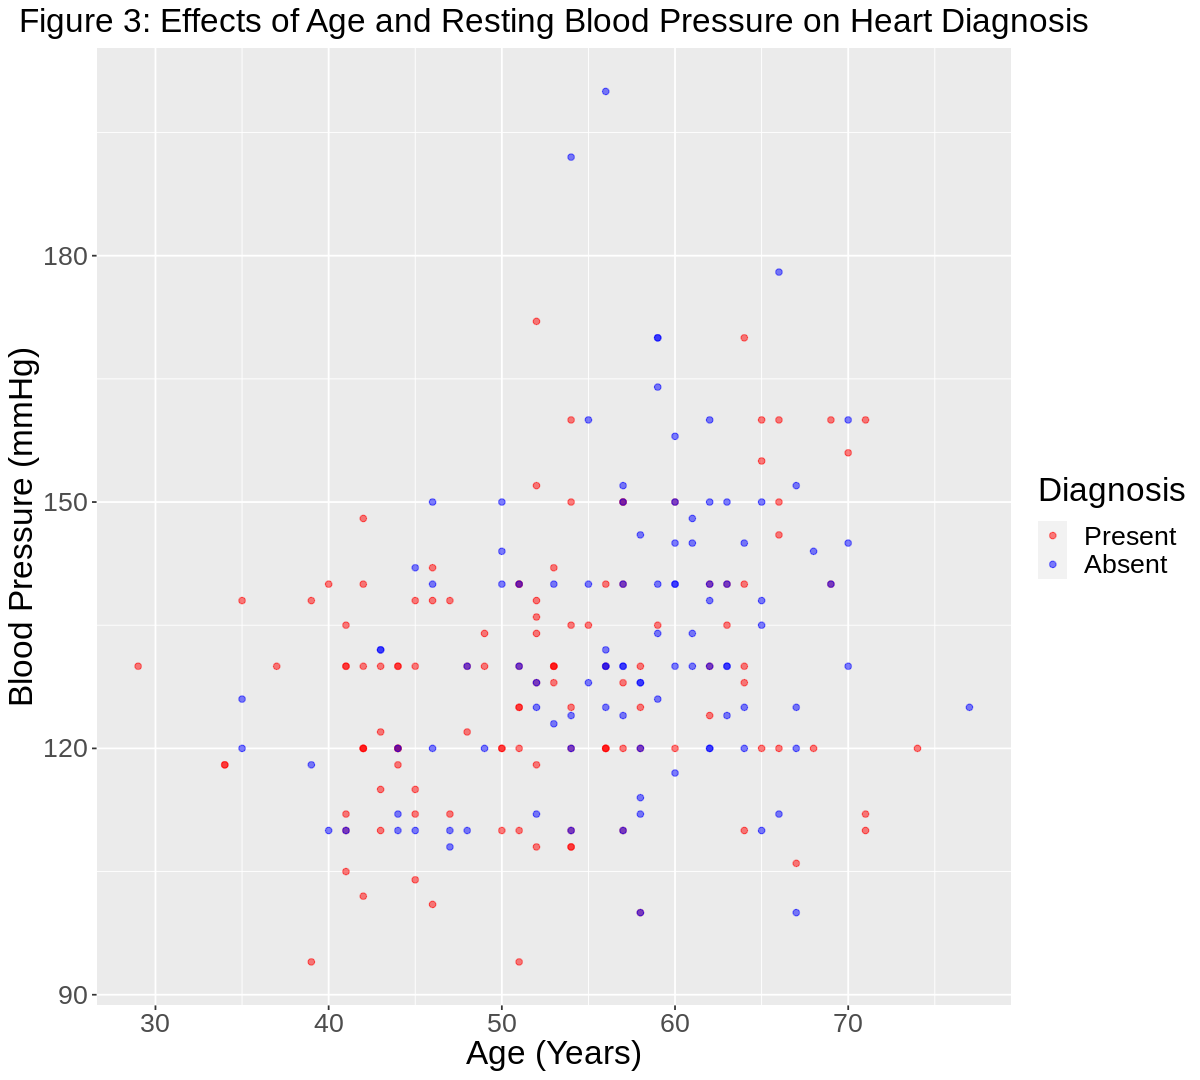

In [12]:
#Creating a plot to visualize effects of age and blood pressure levels

options(repr.plot.width = 10, repr.plot.height = 9)

bp_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = resting_blood_pressure, color = Diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 3: Effects of Age and Resting Blood Pressure on Heart Diagnosis", x = "Age (Years)", y = "Blood Pressure (mmHg)", color = "Diagnosis") +
scale_color_manual(labels = c("Present", "Absent"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
bp_data_plot

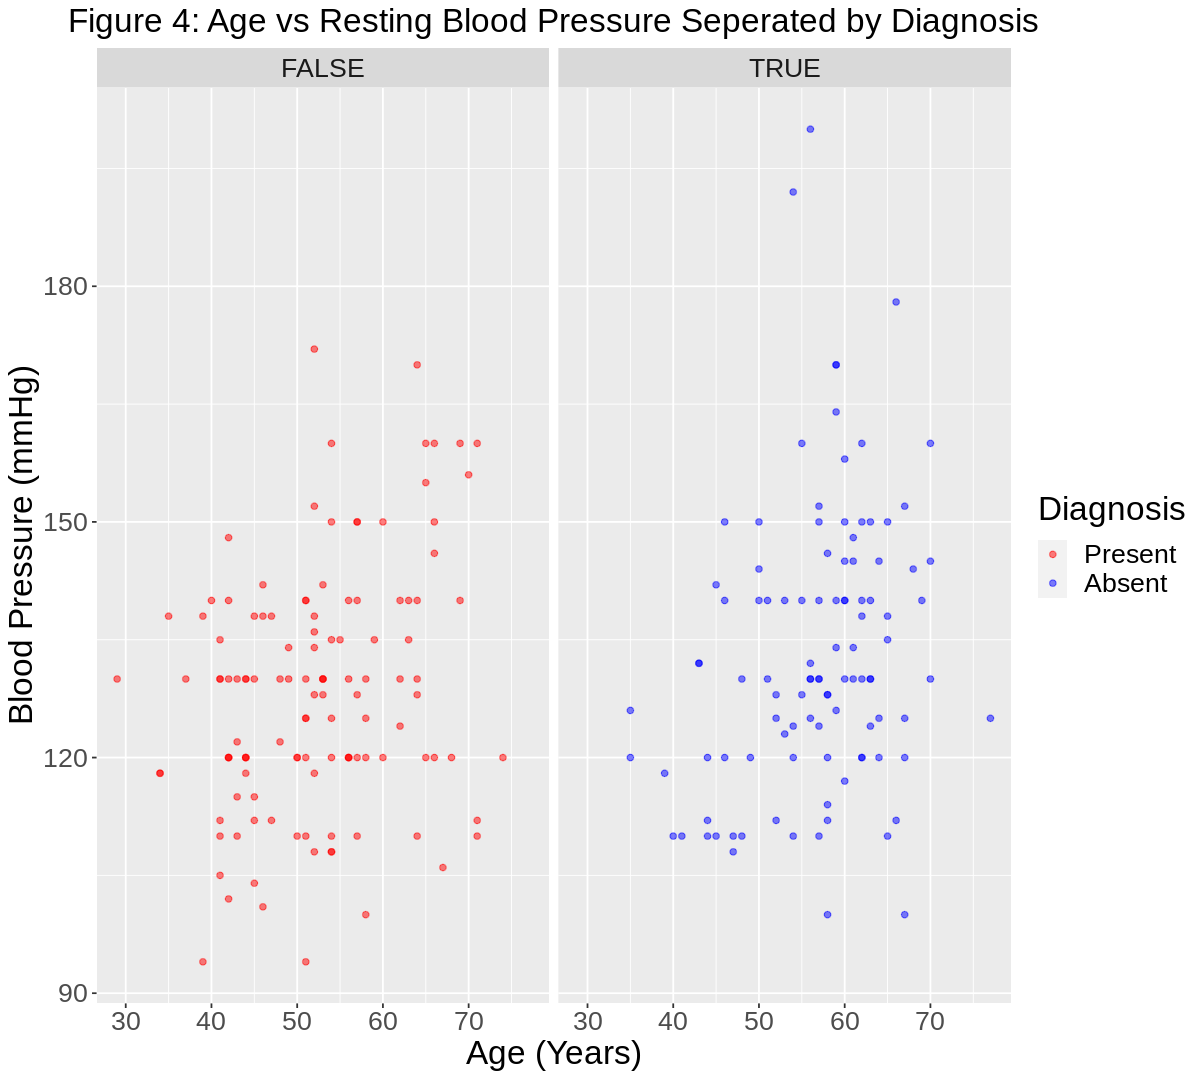

In [13]:
bp_plot_wrapped <- bp_data_plot +
facet_wrap(~Diagnosis) +
labs(title = "Figure 4: Age vs Resting Blood Pressure Seperated by Diagnosis")
bp_plot_wrapped

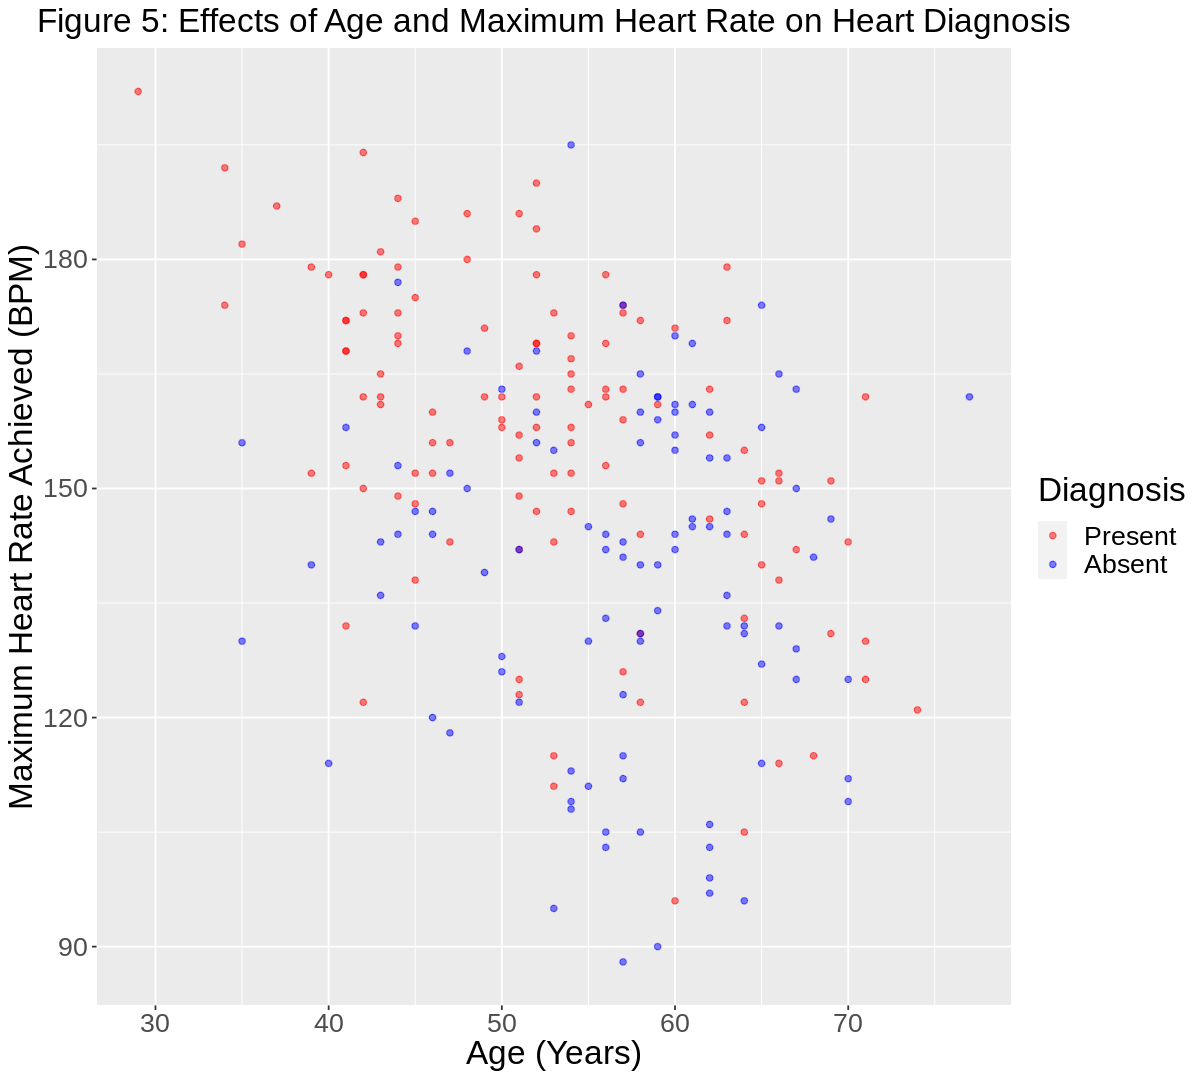

In [14]:
#Creating a plot to visualize effects of age and max heart rate achieved

options(repr.plot.width = 10, repr.plot.height = 9)

hr_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = maximum_heart_rate_achieved, color = Diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 5: Effects of Age and Maximum Heart Rate on Heart Diagnosis", x = "Age (Years)", y = "Maximum Heart Rate Achieved (BPM)", color = "Diagnosis") +
scale_color_manual(labels = c("Present", "Absent"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
hr_data_plot


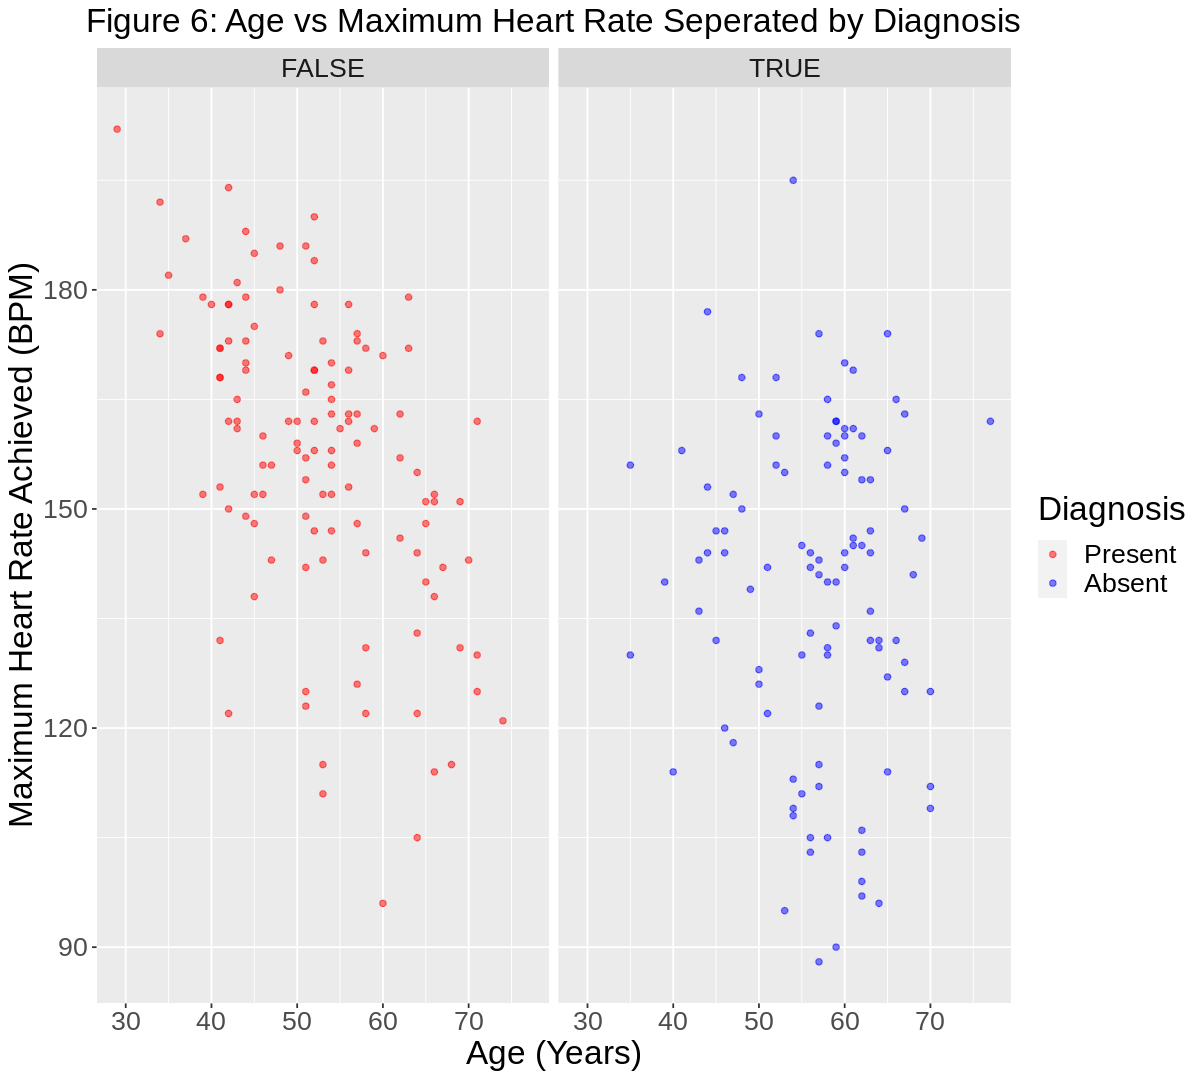

In [15]:
hr_plot_wrapped <- hr_data_plot +
facet_wrap(~Diagnosis)+
labs(title = "Figure 6: Age vs Maximum Heart Rate Seperated by Diagnosis")
hr_plot_wrapped

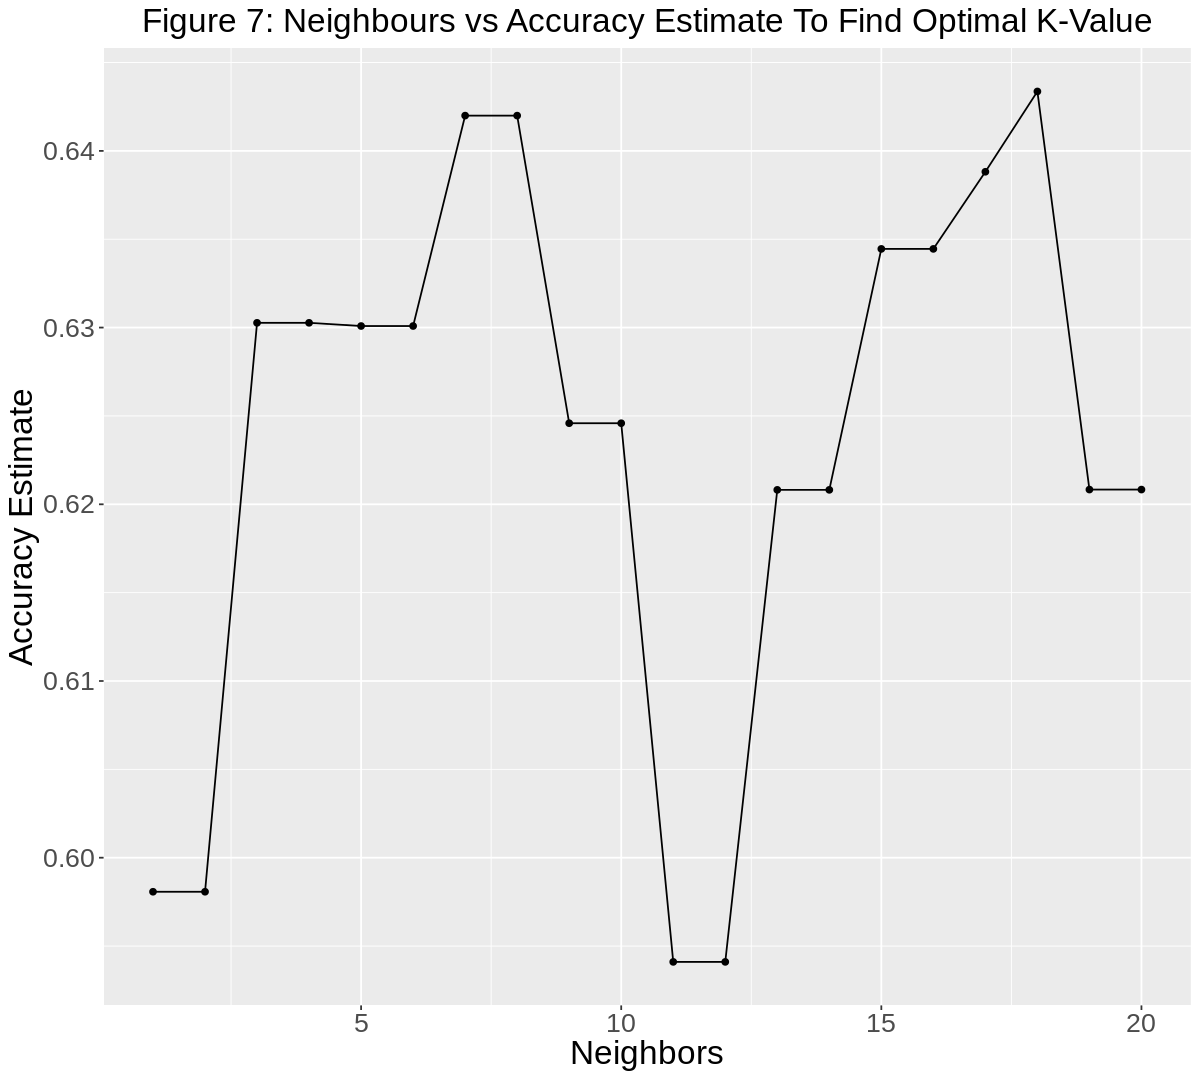

In [16]:
#cross validation model

set.seed(1976)

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_recipe <- recipe(Diagnosis ~ cholesterol_level + maximum_heart_rate_achieved, data = heart_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

heart_vfold <- vfold_cv(heart_data_train, v = 10, strata = Diagnosis)

gridvals <- tibble(neighbors = seq(1, 20, 1))

heart_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- heart_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 7: Neighbours vs Accuracy Estimate To Find Optimal K-Value") +
    theme(text = element_text(size = 20),
         plot.title = element_text(hjust = 0.5, size = 20))
cross_val_plot


In [17]:
k_max <- 18

heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_best_spec) |>
  fit(data = heart_data_train)

heart_predictions <- predict(heart_fit, heart_data_test) |> 
    bind_cols(heart_data_test)

heart_acc <- heart_predictions |> 
    metrics(truth = Diagnosis, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
heart_acc


.metric,.estimate
<chr>,<dbl>
accuracy,0.7236842


**Table 2: Accuracy of classification model**

In [18]:
heart_cm <- heart_predictions |> 
    conf_mat(truth = Diagnosis, estimate = .pred_class)
heart_cm

          Truth
Prediction FALSE TRUE
     FALSE    32   12
     TRUE      9   23

**Table 3: Confusion matrix of classifcation model**

In [19]:
heart_proportions <- heart_data_train |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_data_train))

heart_proportions

Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


**Table 4: Majority classifier showing the majority class label from training data**

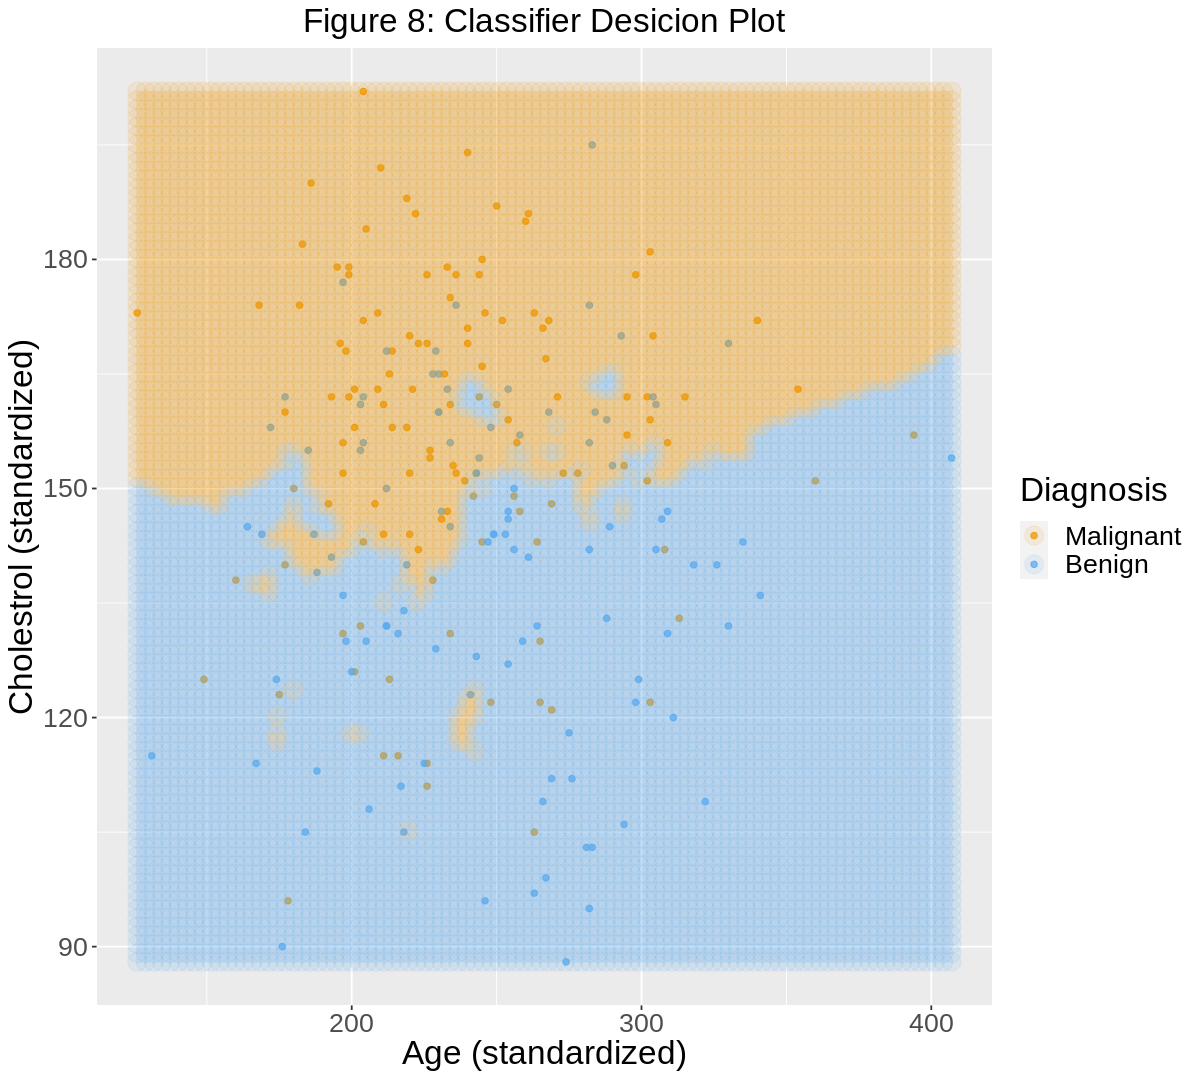

In [25]:
chl_grid <- seq(min(heart_data_train$cholesterol_level), 
                max(heart_data_train$cholesterol_level), 
                length.out = 100)
hr_grid <- seq(min(heart_data_train$maximum_heart_rate_achieved),
               max(heart_data_train$maximum_heart_rate_achieved),
                length.out = 100)
                
asgrid <- as_tibble(expand.grid(cholesterol_level = chl_grid, 
                                maximum_heart_rate_achieved = hr_grid))

PredGrid <- predict(heart_fit, asgrid)

prediction_table <- bind_cols(PredGrid, asgrid) |> 
  rename(Diagnosis = .pred_class)

wkflw_plot <- ggplot() +
  geom_point(data = heart_data_train, 
             mapping = aes(x = cholesterol_level, 
                           y = maximum_heart_rate_achieved, 
                           color = Diagnosis), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = cholesterol_level, 
                           y = maximum_heart_rate_achieved, 
                           color = Diagnosis), 
             alpha = 0.1, 
             size = 5) +
  labs(color = "Diagnosis", 
       x = "Age (standardized)", 
       y = "Cholestrol (standardized)",
       title = "Figure 8: Classifier Desicion Plot") +
  scale_color_manual(labels = c("Malignant", "Benign"), 
                     values = c("orange2", "steelblue2")) +
        theme(text = element_text(size = 20),
         plot.title = element_text(hjust = 0.5, size = 20))

wkflw_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



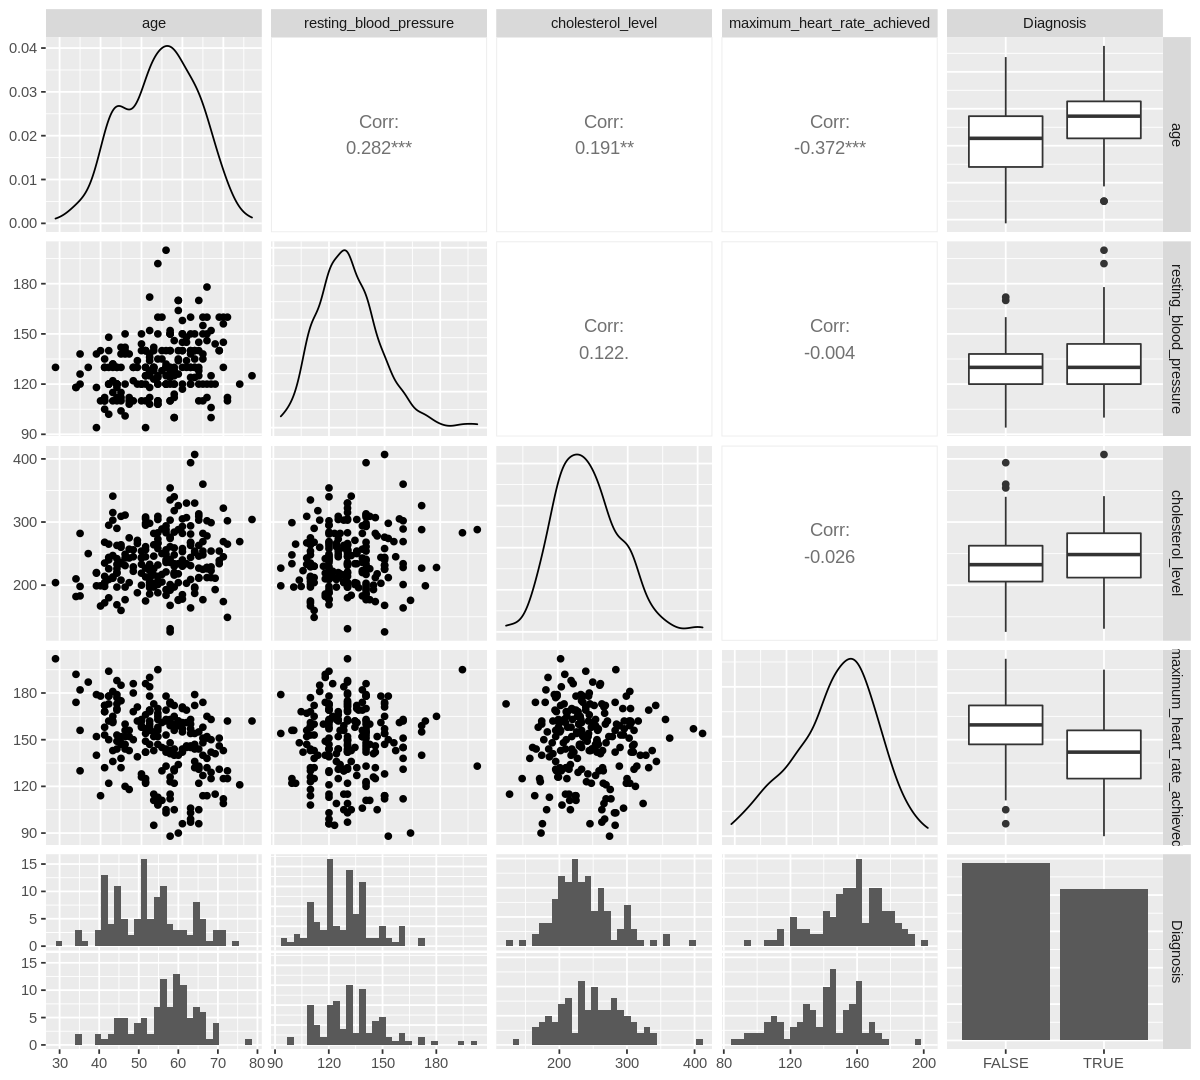

In [21]:
ggpairs_plot <- ggpairs(heart_data_train)
ggpairs_plot

### Discussion

add discussion here

### References

add references here